# DESARROLLO-LABORATORIO 14: APROBACIÓN PRESIDENCIAL

In [1]:
import os   #Cambiar directorio de trabajo

#Manipulación de Datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesado y modelado
from scipy import stats    #Contiene a la función de pearsonr
from scipy import special  #Contiene la función softmax
from sklearn.model_selection import train_test_split #Particionamiento de datos
from sklearn.linear_model import LinearRegression #Para Análisis de Regresión Lineal
from sklearn.linear_model import RANSACRegressor #Para Análisis de Regresión RANSAC
from sklearn.metrics import r2_score #Calcula el coeficiente de determinación r2
from sklearn.metrics import mean_squared_error #Calcula el error cuadratico medio
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import math as m

#Just In Case
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Estableciendo directorio
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [3]:
miArchivo='Aprobacion.csv'
df=pd.read_csv(miArchivo, encoding="latin_1", sep=";")
df.head()

,Año,Mes,IPC,Inflación,SalariosReales,CrisisDeGabinete,LunaDeMiel1,LunaDeMiel2,AñoElectoral,Aprobaciónn,Desaprobación,No precisa,T-1
0,2006,Agosto,90.261885,0.139281,247.00,0,1,0,0,63,16,21,63
1,2006,Septiembre,90.286647,0.027433,246.93,0,1,0,0,58,21,21,63
2,2006,Octubre,90.326182,0.043789,246.82,0,1,0,0,57,24,19,58
3,2006,Noviembre,90.071323,-0.282155,247.52,0,1,0,0,55,22,23,57
4,2006,Diciembre,90.094572,0.025811,247.45,0,1,0,0,52,30,18,55


In [4]:
df['Aprobación']=df['Aprobaciónn']

In [5]:
df.head()

,Año,Mes,IPC,Inflación,SalariosReales,CrisisDeGabinete,LunaDeMiel1,LunaDeMiel2,AñoElectoral,Aprobaciónn,Desaprobación,No precisa,T-1,Aprobación
0,2006,Agosto,90.261885,0.139281,247.00,0,1,0,0,63,16,21,63,63
1,2006,Septiembre,90.286647,0.027433,246.93,0,1,0,0,58,21,21,63,58
2,2006,Octubre,90.326182,0.043789,246.82,0,1,0,0,57,24,19,58,57
3,2006,Noviembre,90.071323,-0.282155,247.52,0,1,0,0,55,22,23,57,55
4,2006,Diciembre,90.094572,0.025811,247.45,0,1,0,0,52,30,18,55,52


In [6]:
del df['Aprobaciónn']

In [7]:
df

,Año,Mes,IPC,Inflación,SalariosReales,CrisisDeGabinete,LunaDeMiel1,LunaDeMiel2,AñoElectoral,Desaprobación,No precisa,T-1,Aprobación
0,2006,Agosto,90.261885,0.139281,247.00,0,1,0,0,16,21,63,63
1,2006,Septiembre,90.286647,0.027433,246.93,0,1,0,0,21,21,63,58
2,2006,Octubre,90.326182,0.043789,246.82,0,1,0,0,24,19,58,57
3,2006,Noviembre,90.071323,-0.282155,247.52,0,1,0,0,22,23,57,55
4,2006,Diciembre,90.094572,0.025811,247.45,0,1,0,0,30,18,55,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2016,Marzo,123.174724,0.598118,271.50,0,0,0,1,77,8,17,15
116,2016,Abril,123.188774,0.011407,271.47,0,0,0,1,75,8,15,17
117,2016,Mayo,123.446933,0.209564,307.02,0,0,0,1,76,7,17,17
118,2016,Junio,123.619152,0.139509,306.59,0,0,0,0,70,11,17,19


Descripción de Variables
    TARGET: Aprobacion---
    X1: Salarios Reales---
    X2: Inflación---
    X3: IPC (índice de precio al consumidor)

## **_1. Realizar un análisis exploratorio de las variables predictoras con respecto al target (matriz de dispersión y mapa de calor de las correlaciones)._**

In [8]:
columnas=['SalariosReales','Inflación','IPC','Aprobación']

In [9]:
df=df[columnas]

In [10]:
df.head()

,SalariosReales,Inflación,IPC,Aprobación
0,247.00,0.139281,90.261885,63
1,246.93,0.027433,90.286647,58
2,246.82,0.043789,90.326182,57
3,247.52,-0.282155,90.071323,55
4,247.45,0.025811,90.094572,52


In [11]:
df.isnull().sum() # Sin valores nulos

SalariosReales    0
Inflación         0
IPC               0
Aprobación        0
dtype: int64

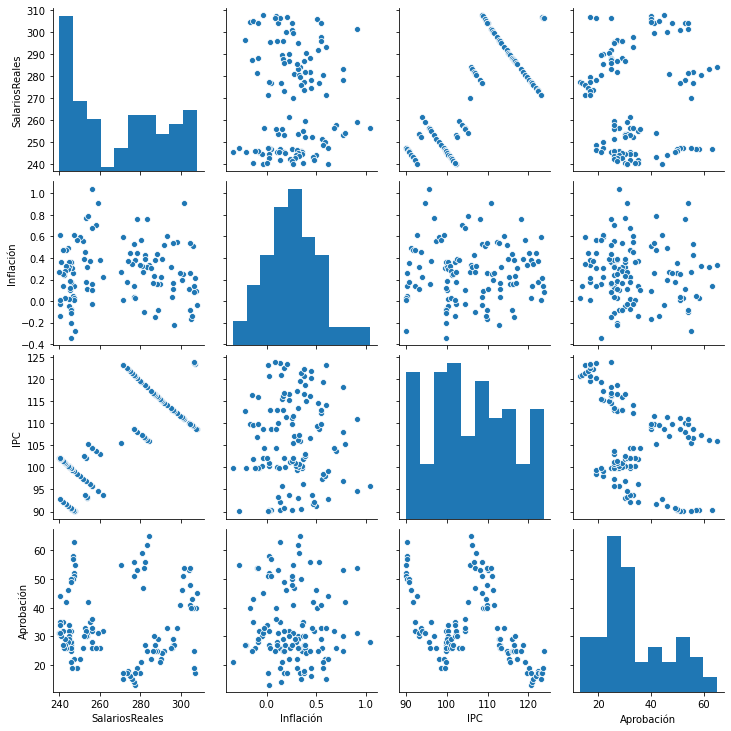

In [12]:
#Con sns.pairplot podemos observar histogramas y las graficas de dispersión
sns.pairplot(df)
plt.show()

In [13]:
#Generando la matriz de correlaciones
cormat=np.corrcoef(df.values.T)
cormat

array([[ 1.        ,  0.0164041 ,  0.75247404,  0.04432866],
       [ 0.0164041 ,  1.        ,  0.02742033, -0.06338763],
       [ 0.75247404,  0.02742033,  1.        , -0.42896134],
       [ 0.04432866, -0.06338763, -0.42896134,  1.        ]])

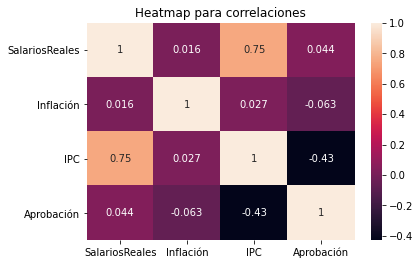

In [14]:
#Usando HeatMap para visualizar mejor la correlación entre variables
hm=sns.heatmap(data=cormat,
               annot=True, #Muestra los valores de las correlaciones en las celdas
               cbar=True, #barra de color a modo de saturación
               xticklabels=columnas,
               yticklabels=columnas)
plt.title('Heatmap para correlaciones')
plt.show()

In [15]:
#Correlación lineal entre dos variables ('SalariosReales'-'Aprobaciónn')
cor_test=stats.pearsonr(df['SalariosReales'],df['Aprobación'])
print(cor_test)
print('El p-value es:', cor_test[1]) #El p-value es mayor a 0.5, nos da una correlación no significativa

(0.04432865519545246, 0.6306943167137045)
El p-value es: 0.6306943167137045


In [16]:
#Correlación lineal entre dos variables ('Inflación'-'Aprobaciónn')
cor_test=stats.pearsonr(df['Inflación'],df['Aprobación'])
print(cor_test)
print('El p-value es:', cor_test[1]) #El p-value es un poco menor a 0.5, nos da una correlación no significativa

(-0.06338762678425294, 0.4915782274933316)
El p-value es: 0.4915782274933316


In [17]:
#Correlación lineal entre dos variables ('IPC'-'Aprobaciónn')
cor_test=stats.pearsonr(df['IPC'],df['Aprobación'])
print(cor_test)
print('El p-value es:', cor_test[1])  #El p-value es muy pequeño, tiende a 0 , nos da una correlación significativa

(-0.42896133654330026, 1.0170266803445158e-06)
El p-value es: 1.0170266803445158e-06


## **_2.Construir los datos de entrenamiento y de prueba, teniendo en cuenta que 70% de los datos es para entrenamiento y 30% de prueba._**

**Caso Regresion lineal Simple**

In [18]:
#Establecer nuestra matriz de datos X y variable target Y (Para regresion lineal simple)
Xrls=df[['SalariosReales']]
yrls=df[['Aprobación']]

In [19]:
X_trainrls,X_testrls,y_trainrls,y_testrls=train_test_split(Xrls,
                                                           yrls,
                                                           test_size=0.3,
                                                           random_state=2020)

**Caso Regresion Lineal Multiple**

In [20]:
#Establecer nuestra matriz de datos X y variable target Y (Para regresion lineal multiple)
Xrlm=df.iloc[:,:3].values
yrlm=df.iloc[:,3].values

In [21]:
X_trainrlm,X_testrlm,y_trainrlm,y_testrlm=train_test_split(Xrlm,
                                                           yrlm,
                                                           test_size=0.3,
                                                           random_state=2020)

## **_3.Realizar un modelo de regresión lineal simple: TARGET ~ X1_**

In [22]:
#Creando una instancia LinearRegression()
modelorls=LinearRegression()

In [23]:
#Hacemos que el modelo aprenda de los datos
modelorls.fit(X_trainrls,y_trainrls)

LinearRegression()

In [24]:
#Información del Modelo
#=====================================
print("El interceptor del modelo es :",modelorls.intercept_.round(3))
print("La pendiente del modelo es:",modelorls.coef_[0].round(3))
print("El coeficiente de determinacion R2 es:", (modelorls.score(X_trainrls,y_trainrls)*100).round(2), "%")

El interceptor del modelo es : [38.336]
La pendiente del modelo es: [-0.018]
El coeficiente de determinacion R2 es: 0.11 %


In [25]:
#Estimacion de la variable Dependiente o YPredicho
ytrainrls_pred=modelorls.predict(X_trainrls)
ytestrls_pred=modelorls.predict(X_testrls)

#### _Evaluacion de Modelos (RMSE)_

In [26]:
#para data de entrenamiento
round(m.sqrt(mean_squared_error(y_trainrls,ytrainrls_pred)),3)

12.256

In [27]:
#para data de testing
round(m.sqrt(mean_squared_error(y_testrls,ytestrls_pred)),3)

13.447

#### _Evaluacion de Modelos (R2)_

In [28]:
#para data de entrenamiento
round(r2_score(y_trainrls,ytrainrls_pred),3)

0.001

In [29]:
#para data de testing
round(r2_score(y_testrls,ytestrls_pred),3)

-0.014

**Resumen de metricas del modelo**

In [30]:
X_constant=sm.add_constant(Xrls)
lin_reg= sm.OLS(yrls,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Aprobación   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2323
Date:                Wed, 28 Apr 2021   Prob (F-statistic):              0.631
Time:                        15:28:37   Log-Likelihood:                -474.20
No. Observations:                 120   AIC:                             952.4
Df Residuals:                     118   BIC:                             958.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             26.7838     13.810      1.939      0.055      -0.563      54.131
SalariosReales     0.0247      0.051      0.482      0.631      -0.077       0.126
==============================================================================
Omnibus:                        9.781   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.028
Skew:                           0.666   Prob(JB):                      0.00664
Kurtosis:                       2.521   Cond. No.                     3.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#Creando una función para visualizar los datos y la recta de regresión
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='blue')
    plt.plot(X,model.predict(X),color='red')
    return

### _Graficando mis datos de entrenamiento_

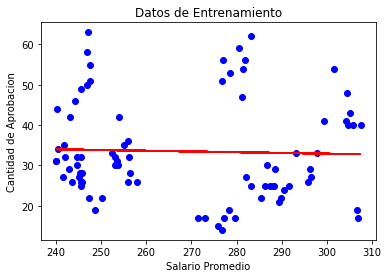

In [32]:
lin_regplot(X_trainrls,y_trainrls,modelorls)
plt.title('Datos de Entrenamiento')
plt.xlabel('Salario Promedio')
plt.ylabel('Cantidad de Aprobacion')
plt.show()

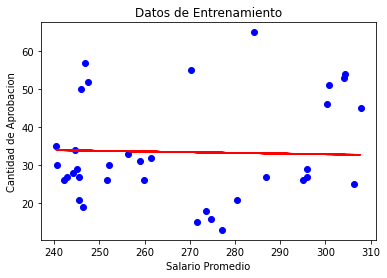

In [33]:
lin_regplot(X_testrls,y_testrls,modelorls)
plt.title('Datos de Entrenamiento')
plt.xlabel('Salario Promedio')
plt.ylabel('Cantidad de Aprobacion')
plt.show()

## **_4.Realizar un modelo de regresión lineal múltiple: TARGET ~ X1 +X2 +X3_**

In [34]:
#Instnanciar un objeto de clase LinearRegression()
modelorlm=LinearRegression()
#Hacer que nuestro modelo aprenda de los datos
modelorlm.fit(X_trainrlm,y_trainrlm)

LinearRegression()

In [35]:
#Estimar los valores de Ypredicho
y_trainrlm_pred=modelorlm.predict(X_trainrlm)
y_testrlm_pred=modelorlm.predict(X_testrlm)

In [36]:
#Evaluando el coeficiente de determinacon R2
print("Coeficiente de Determinacion-Training",r2_score(y_trainrlm,y_trainrlm_pred).round(2))
print("Coeficiente de Determinacion-Testing",r2_score(y_testrlm,y_testrlm_pred).round(2))

Coeficiente de Determinacion-Training 0.46
Coeficiente de Determinacion-Testing 0.56


In [37]:
#Evaluando el MSE
print("RMSE-Training",round(m.sqrt(mean_squared_error(y_trainrlm,y_trainrlm_pred)),2))
print("RMSE-Testing",round(m.sqrt(mean_squared_error(y_testrlm,y_testrlm_pred)),2))

RMSE-Training 8.98
RMSE-Testing 8.87


**Resumen de metricas del modelo**

In [38]:
X_constant=sm.add_constant(Xrlm)
lin_reg= sm.OLS(yrlm,X_constant).fit()
lin_reg.summary()
#X1: Salarios Reales
#X2: Inflación
#X3: IPC (índice de precio al consumidor)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     38.21
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           3.02e-17
Time:                        15:28:38   Log-Likelihood:                -433.09
No. Observations:                 120   AIC:                             874.2
Df Residuals:                     116   BIC:                             885.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.1743     10.224      5.299      0.000      33.924      74.424
x1             0.4711      0.056      8.460      0.000       0.361       0.581
x2            -2.2769      3.119     -0.730      0.467      -8.455       3.901
x3            -1.3834      0.130    -10.640      0.000      -1.641      -1.126
==============================================================================
Omnibus:                        8.474   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.593
Skew:                           0.653   Prob(JB):                       0.0136
Kurtosis:                       3.117   Cond. No.                     3.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Grafica**

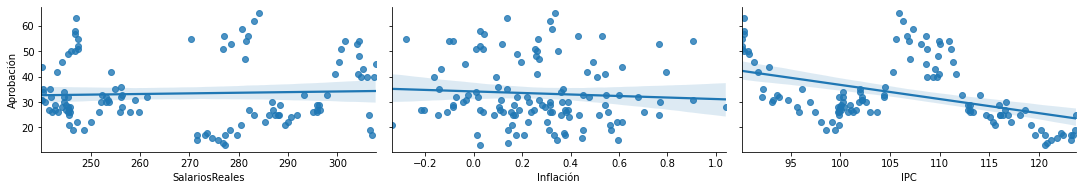

In [39]:
sns.pairplot(df,x_vars=['SalariosReales','Inflación','IPC'],y_vars=['Aprobación'],kind='reg',aspect=2,palette=['red','green'])
plt.show()